In [4]:
# Importing packages
import numpy as np
import sympy
from matplotlib import pyplot as plt
import random 

# Defining sympy printing
sympy.init_printing( True )


In [42]:
# Defining the variables x_i, y_i, u_i and v_i
x_0, y_0, v_0, u_0 = sympy.symbols(('x_0', 'y_0', 'v_0', 'u_0'))
x_1, y_1, v_1, u_1 = sympy.symbols(('x_1', 'y_1', 'v_1', 'u_1'))

# Defining coefficients C_ij
C_00, C_01, C_10, C_11 = sympy.symbols(('C_00', 'C_01', 'C_10', 'C_11'))

# Defining equations
eq1 = sympy.Eq(C_00*x_0*u_0 + C_01*x_0*u_1 + C_10*x_1*u_0 + C_11*x_1*u_1, 1)
eq2 = sympy.Eq(C_00*y_0*u_0 + C_01*y_0*u_1 + C_10*y_1*u_0 + C_11*y_1*u_1, 0)
eq3 = sympy.Eq(C_00*x_0*v_0 + C_01*x_0*v_1 + C_10*x_1*v_0 + C_11*x_1*v_1, 0)
eq4 = sympy.Eq(C_00*y_0*v_0 + C_01*y_0*v_1 + C_10*y_1*v_0 + C_11*y_1*v_1, 1)

# Adding constraints for the variables x_i, y_i, u_i, v-i
con_xy_0 = sympy.Eq(x_0**2 + y_0**2, 1)
con_xy_1 = sympy.Eq(x_1**2 + y_1**2, 1)
con_uv_0 = sympy.Eq(u_0**2 + v_0**2, 1)
con_uv_1 = sympy.Eq(u_1**2 + v_1**2, 1)

# Creating arrays of the equations, constraints and hyperplanes
eqs = [eq1, eq2, eq3, eq4]
constraints = [con_xy_0, con_xy_1, con_uv_0, con_uv_1]
variables = [C_00, C_01, C_10, C_11, x_0, y_0, u_0, v_0, x_1, y_1, u_1, v_1]

# Initializing empty array
h_plane = []

# creating N amount of hyperplanes, where N is te number of variables
for i in range(len(variables)):
    # Initializing random array
    rand_array = np.random.rand(len(variables)+1)

    # Creating summation of the variables
    summation = 0
    indices = [j for j in range(len(variables))]
    random.shuffle(indices)
    for j in indices[:-1]:
        summation += rand_array[j]*variables[j]

    # Adding hyperplane to the h_plane array
    h_plane.append(sympy.Eq(summation, rand_array[-1]))



In [58]:
# Solving set of equations
# ans = sympy.solve([*eqs, *cons, *h_plane], [*variables])
ans = sympy.solve([eqs[0], *constraints], *[x_0, u_0, x_1, u_1])

In [60]:
# calculating the Groebner basis
G = sympy.groebner([*eqs, *constraints], *variables)

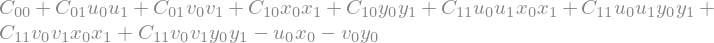

In [71]:
# Printing parts of the Groebner basis to see if we can solve it for one of the variables
# print(G[0], '\n')
# print(G[2])


In [86]:
S = sympy.solve([*eqs, *constraints], [C_00, C_01, C_10, C_11, x_0, y_0])

In [91]:
S = sympy.solve([*G, h_plane[0]], [x_0])

In [90]:
S